<center>
    <h1> CardioRisk: Unraveling Patterns for Early Diagnosis Using Machine Learning </h1>
    <h2> Modeling : Random Forest </h2>
    <h4> Akansha Malviya</h4>
</center>

## 1. Load Train, Validation and Test Sets

In [1]:
import pandas as pd

# Read the datasets from the CSV files
X_train = pd.read_csv('Split Data/X_train_pca.csv')
y_train = pd.read_csv('Split Data/y_train.csv').iloc[:, 0]

X_val = pd.read_csv('Split Data/X_val_pca.csv')
y_val = pd.read_csv('Split Data/y_val.csv').iloc[:, 0]

X_test = pd.read_csv('Split Data/X_test_pca.csv')
y_test = pd.read_csv('Split Data/y_test.csv').iloc[:, 0]

In [2]:
X_train.drop(columns=['target'], inplace=True)
X_val.drop(columns=['target'], inplace=True)
X_test.drop(columns=['target'], inplace=True)

In [3]:
X_train.head(5)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,-0.766935,-2.353474,0.666855,1.790006,2.471166,2.477473,0.962876,-2.439171,0.404615,-1.986088,...,-0.116147,1.710136,0.313500,-0.651644,-0.216032,-0.820337,-0.844128,-0.591588,0.538382,0.012462
1,-3.732850,-2.177280,-1.935404,1.336955,-0.652893,0.839545,0.218358,-0.386887,-0.144375,-0.500492,...,0.968119,-0.443013,0.311716,-0.672536,-1.066886,-0.055299,0.003194,-0.539007,0.788195,-0.187139
2,1.843476,-0.389318,-0.046146,1.063272,0.402922,-0.240648,0.047470,0.841115,0.135274,-2.172294,...,-0.525561,-0.168109,-0.205389,-0.774231,-0.651174,0.174469,-0.121232,0.297091,-1.092843,-0.510920
3,-2.048637,-0.149163,0.158482,-1.459777,-1.914820,-0.667933,-0.366468,1.192296,1.081936,-0.271876,...,0.321388,0.575804,-0.208756,0.483045,0.270546,0.331686,-0.144162,0.006243,0.144280,-0.086948
4,4.328346,1.455783,-1.130231,0.692913,-0.472766,1.465060,-0.779669,-2.449843,-1.778051,-0.790932,...,-0.396674,-0.673324,0.403204,-0.510762,1.919140,-0.062170,-0.202954,-0.479562,0.876458,0.032876


## 2. Baseline Model (Train Set)

Train Entropy: 0.9889189412129864
Train MSE: 0.0
Train Gini Impurity: 0.49233888049582064
Train Log Loss (Cross-Entropy): 0.08043613252447657
Training Accuracy (RF): 1.0000
Training Balanced Accuracy (Rf): 1.0000
Training Precision (RF): 1.0000
Training Recall (RF): 1.0000
Training F1 Score (RF): 1.0000
Training ROC AUC (RF): 1.0000
Training Log Loss (RF): 0.0804

 Training Classification Report (RF):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       315
         1.0       1.00      1.00      1.00       404

    accuracy                           1.00       719
   macro avg       1.00      1.00      1.00       719
weighted avg       1.00      1.00      1.00       719


 Training Confusion Matrix (RF):
[[315   0]
 [  0 404]]


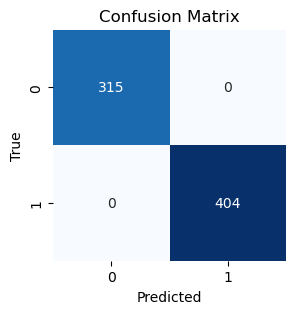

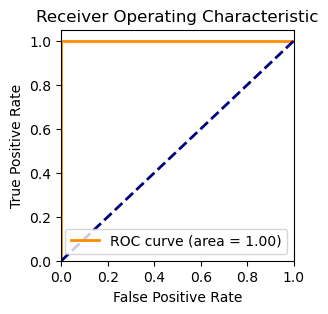

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,
    balanced_accuracy_score, mean_squared_error,log_loss, precision_score, recall_score, f1_score, make_scorer
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import export_text,  _tree
from scipy.stats import entropy
import numpy as np

# Entropy calculation function
def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Mean Squared Error (MSE) calculation function
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Gini impurity calculation function
def calculate_gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini_impurity = 1 - np.sum(probabilities ** 2)
    return gini_impurity

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Prediction on training data
y_train_pred_rf = rf_classifier.predict(X_train)
y_train_proba_rf = rf_classifier.predict_proba(X_train)[:, 1]

# Calculate metrics
train_entropy_rf = calculate_entropy(y_train)
train_mse_rf = calculate_mse(y_train, y_train_pred_rf)
train_gini_impurity_rf = calculate_gini_impurity(y_train)

# Additional metric for binary classification - log loss (cross-entropy)
train_log_loss_rf = log_loss(y_train, rf_classifier.predict_proba(X_train)[:, 1])

# Print the metrics
print("Train Entropy:", train_entropy_rf)
print("Train MSE:", train_mse_rf)
print("Train Gini Impurity:", train_gini_impurity_rf)
print("Train Log Loss (Cross-Entropy):", train_log_loss_rf)

# Calculate other metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

train_balanced_accuracy_rf = balanced_accuracy_score(y_train, y_train_pred_rf)

train_precision_rf = precision_score(y_train, y_train_pred_rf)

train_recall_rf = recall_score(y_train, y_train_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf)

train_roc_auc_rf = roc_auc_score(y_train, y_train_proba_rf)

train_log_loss_rf = log_loss(y_train, y_train_proba_rf)

train_conf_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)

train_classification_report_rf = classification_report(y_train, y_train_pred_rf)

# Printing all the metrics
print(f"Training Accuracy (RF): {train_accuracy_rf:.4f}")
print(f"Training Balanced Accuracy (Rf): {train_balanced_accuracy_rf:.4f}")
print(f"Training Precision (RF): {train_precision_rf:.4f}")
print(f"Training Recall (RF): {train_recall_rf:.4f}")
print(f"Training F1 Score (RF): {train_f1_rf:.4f}")
print(f"Training ROC AUC (RF): {train_roc_auc_rf:.4f}")
print(f"Training Log Loss (RF): {train_log_loss_rf:.4f}")
print("\n Training Classification Report (RF):")
print(train_classification_report_rf)
print("\n Training Confusion Matrix (RF):")
print(train_conf_matrix_rf)

# Plot the confusion matrix
#The Confusion matrix shows how well the tree separates the classes correctly using these metrics: 
#True positive rate (TPR) — the probability that an event case is predicted correctly. 
#False positive rate (FPR) — the probability that a nonevent case is predicted incorrectly.
plt.figure(figsize=(3, 3))
sns.heatmap(train_conf_matrix_rf, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_train, y_train_proba_rf)
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % train_roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 3. Model Validation: Cross Validation & Hyperparameter Tuning (Validation Set)

Performing cross-validation and tuning hyperparameters to improve the performance of our model.

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_rf_model = grid_search.best_estimator_

# Now you can use this best model for predictions on your validation or test set
y_val_pred_rf = best_rf_model.predict(X_val)

# You can also calculate metrics on the validation set using the same approach as you did for the training set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_classification_report_rf = classification_report(y_val, y_val_pred_rf)

# Print validation metrics
print(f"Validation Accuracy (RF): {val_accuracy_rf:.4f}")
print("\nValidation Classification Report (RF):")
print(val_classification_report_rf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9430
Validation Accuracy (RF): 0.9333

Validation Classification Report (RF):
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93        44
         1.0       0.90      0.98      0.94        46

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



## 4. Model Evaluation (Test Set)

We evaluate the optimized model's effectiveness on the test dataset, employing a diverse range of metrics. The outcomes are presented through uniformly sized visualizations, showcasing both the confusion matrix and the ROC curve.

Test Entropy: 1.0
Test MSE: 0.05555555555555555
Test Gini Impurity: 0.5
Test Log Loss (Cross-Entropy): 0.26012132725275605
Test Accuracy (RF): 0.9444
Test Balanced Accuracy (RF): 0.9444
Test Precision (RF): 0.9167
Test Recall (RF): 0.9778
Test F1 Score (RF): 0.9462
Test ROC AUC (RF): 0.9719
Test Log Loss (RF): 0.2601

 Test Classification Report (RF):
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        45
         1.0       0.92      0.98      0.95        45

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90


 Test Confusion Matrix (RF):
[[41  4]
 [ 1 44]]


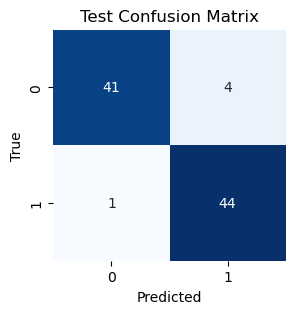

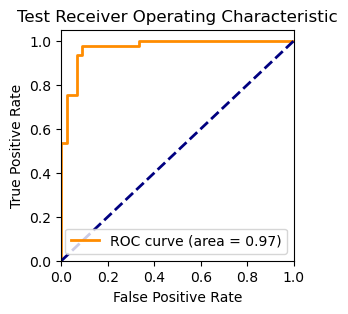

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samp

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sampl

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sampl

In [7]:
#from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
#rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
#rf_classifier.fit(X_test, y_test)

# Prediction on test data
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Entropy calculation function
def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Mean Squared Error (MSE) calculation function
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Gini impurity calculation function
def calculate_gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini_impurity = 1 - np.sum(probabilities ** 2)
    return gini_impurity

# Calculate metrics
test_entropy_rf = calculate_entropy(y_test)
test_mse_rf = calculate_mse(y_test, y_test_pred_rf)
test_gini_impurity_rf = calculate_gini_impurity(y_test)

# Additional metric for binary classification - log loss (cross-entropy)
test_log_loss_rf = log_loss(y_test, y_test_proba_rf)

# Print the metrics
print("Test Entropy:", test_entropy_rf)
print("Test MSE:", test_mse_rf)
print("Test Gini Impurity:", test_gini_impurity_rf)
print("Test Log Loss (Cross-Entropy):", test_log_loss_rf)

# Calculate other metrics for test data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

test_balanced_accuracy_rf = balanced_accuracy_score(y_test, y_test_pred_rf)

test_precision_rf = precision_score(y_test, y_test_pred_rf)

test_recall_rf = recall_score(y_test, y_test_pred_rf)

test_f1_rf = f1_score(y_test, y_test_pred_rf)

test_roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

test_log_loss_rf = log_loss(y_test, y_test_proba_rf)

test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

test_classification_report_rf = classification_report(y_test, y_test_pred_rf)

# Printing all the metrics for test data
print(f"Test Accuracy (RF): {test_accuracy_rf:.4f}")
print(f"Test Balanced Accuracy (RF): {test_balanced_accuracy_rf:.4f}")
print(f"Test Precision (RF): {test_precision_rf:.4f}")
print(f"Test Recall (RF): {test_recall_rf:.4f}")
print(f"Test F1 Score (RF): {test_f1_rf:.4f}")
print(f"Test ROC AUC (RF): {test_roc_auc_rf:.4f}")
print(f"Test Log Loss (RF): {test_log_loss_rf:.4f}")
print("\n Test Classification Report (RF):")
print(test_classification_report_rf)
print("\n Test Confusion Matrix (RF):")
print(test_conf_matrix_rf)

# Plot the confusion matrix for test data
plt.figure(figsize=(3, 3))
sns.heatmap(test_conf_matrix_rf, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.show()

# Plot the ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba_rf)
plt.figure(figsize=(3, 3))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 5. Model Interpretability/Explainability

Model interpretability/explainability is crucial for understanding how a machine learning model makes predictions.
One common method for interpreting a Random Forest model is to analyze feature importance.
We calculated the feature importance of each variable in the Random Forest model and then plots a bar chart to visualize the importance of each feature. Features with higher importance contribute more to the model's predictions.

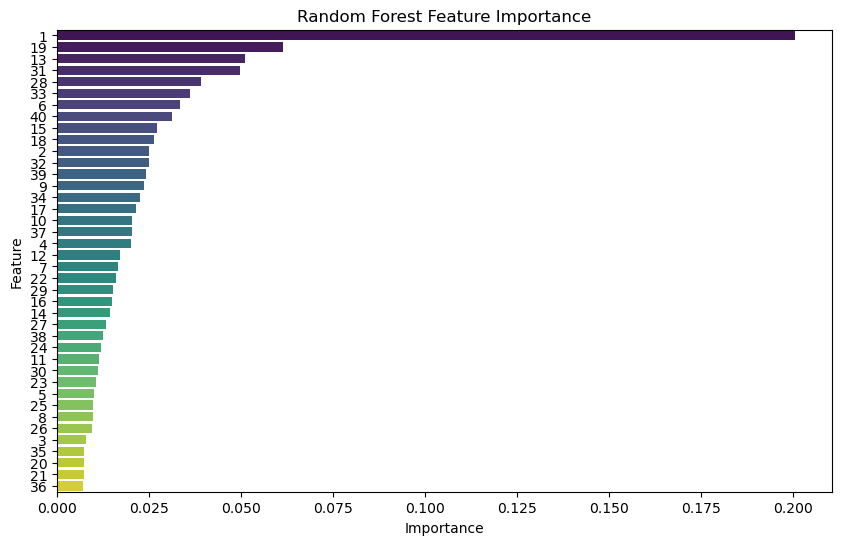

In [9]:
rf_classifier.fit(X_test, y_test)

# Feature Importance
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

Another method for model interpretability is to use SHAP (SHapley Additive exPlanations) values. SHAP values provide a way to fairly distribute the contribution of each feature to the prediction. Here's how you can use the shap library to generate a summary plot:



In [10]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


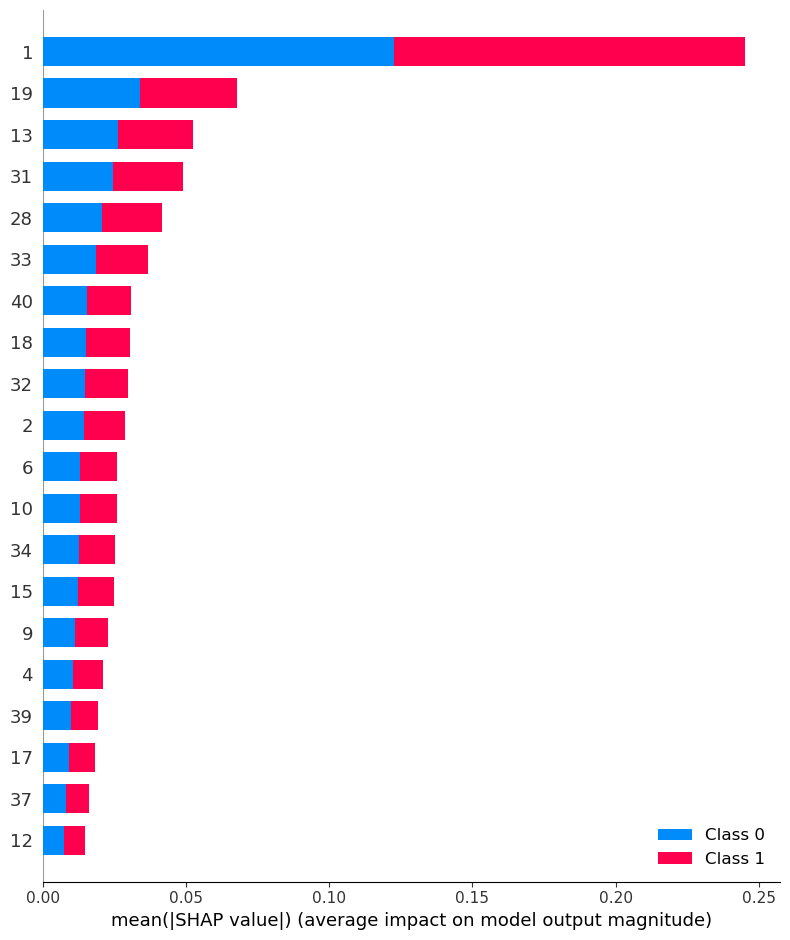

In [11]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Summary plot
shap.summary_plot(shap_values, X_test.iloc[:100, :], plot_type='bar')

## 6. Limitations and Future Work

Limitations:

Interpretability Challenges: Random Forest models, by nature, lack interpretability due to the ensemble of decision trees. While feature importance is assessed, understanding complex interactions can be challenging.

Overfitting Risk: The model may be prone to overfitting, especially with a large number of trees. Despite hyperparameter tuning, the risk of capturing noise in the training data exists.

Hyperparameter Sensitivity: The performance heavily depends on hyperparameter settings. Changes in these parameters may yield different results, and the optimal values may vary for different datasets.

Assumption of Independence: Random Forest assumes independence between trees, which may not hold true if the data has strong temporal or spatial dependencies.

Future Work:

Ensemble Diversity: Explore methods to enhance diversity among ensemble members, potentially through employing different types of models or algorithms.

Advanced Interpretability Techniques: Implement advanced interpretability techniques, such as SHAP values or LIME, to gain deeper insights into individual predictions and feature interactions.

Addressing Overfitting: Experiment with regularization techniques or consider using a subset of features to mitigate the risk of overfitting.

Data Quality Improvement: Enhance the quality of the dataset by addressing outliers, missing values, or other data anomalies that may impact model performance.

Algorithm Exploration: Consider alternative ensemble methods or machine learning algorithms to compare and contrast performance against the Random Forest model.

Temporal Analysis: If applicable, conduct a temporal analysis to assess model performance over time and identify potential changes in data patterns.

Remember, continuous monitoring and iterative improvement are crucial for adapting the model to evolving data characteristics.